In [32]:
import os
import onnx
import torch
import torchvision

import numpy as np
import pandas as pd
import onnxruntime as ort
import matplotlib.pyplot as plt


In [25]:
torch.cuda_version, ort.__version__

('10.2', '1.8.1')

## Load results

Results where obtained by running:
```
python benchmark.py -f pytorch -m all -b 6 -d cpu cuda -e -v
python benchmark.py -f onnx -m all -b 6 -d cpu cuda -e -v
```

In [51]:
results_dir = '../results'
results = [f'{results_dir}/{f}' for f in os.listdir(results_dir)]
results

['../results/onnx.csv', '../results/pytorch.csv']

In [52]:
dfs = [pd.read_csv(f) for f in results]

df = pd.concat(dfs, ignore_index=True)

## Plot results

In [26]:
df

,model,device,bs,time,engine
0,resnet18,cpu,1,11.002541,onnx
1,resnet18,cpu,2,12.000203,onnx
2,resnet18,cpu,4,13.999760,onnx
3,resnet18,cpu,8,11.125118,onnx
4,resnet18,cpu,16,11.624947,onnx
...,...,...,...,...,...
367,mnasnet0_5,cuda,2,5.464196,pytorch
368,mnasnet0_5,cuda,4,2.225757,pytorch
369,mnasnet0_5,cuda,8,1.241535,pytorch
370,mnasnet0_5,cuda,16,0.620216,pytorch


In [31]:
df.model.nunique(), df.model.unique()

(16,
 array(['resnet18', 'resnet50', 'alexnet', 'vgg16', 'vgg19',
        'squeezenet1_1', 'densenet121', 'inception_v3', 'googlenet',
        'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small',
        'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet0_5',
        'shufflenet_v2_x1_0'], dtype=object))

In [38]:
df[(df.model == 'alexnet') & (df.engine == 'pytorch')]

,model,device,bs,time,engine
204,alexnet,cpu,1,15.002251,pytorch
205,alexnet,cpu,2,14.985085,pytorch
206,alexnet,cpu,4,10.999739,pytorch
207,alexnet,cpu,8,9.001255,pytorch
208,alexnet,cpu,16,7.875681,pytorch
209,alexnet,cpu,32,6.749906,pytorch
210,alexnet,cuda,1,0.999928,pytorch
211,alexnet,cuda,2,0.999689,pytorch
212,alexnet,cuda,4,0.499964,pytorch
213,alexnet,cuda,8,0.124902,pytorch


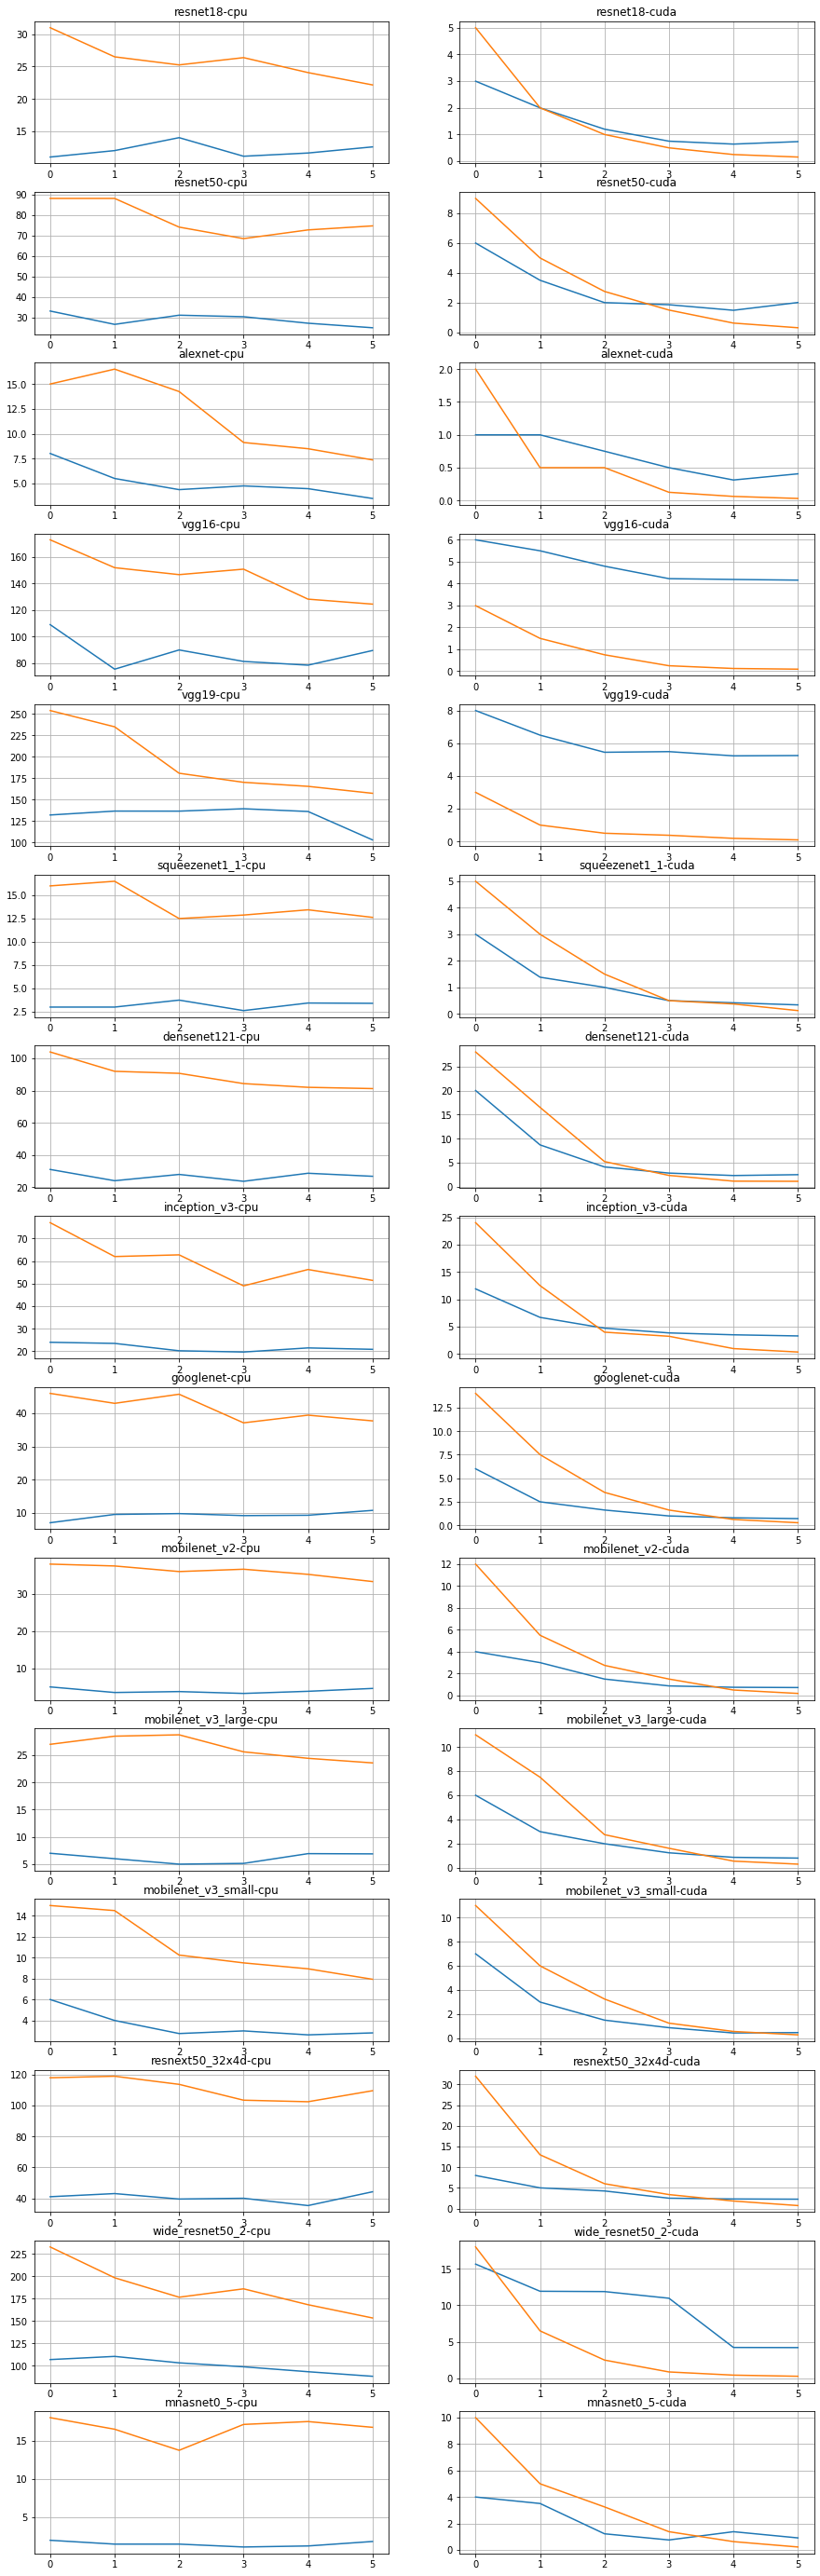

In [53]:
# def plot_results(df, device):
architectures = df.model.unique()
engines = df.engine.unique()

count = len(architectures)

fig, axs = plt.subplots(count, len(engines), figsize=(15,50))

axs = axs.flatten()

for i, arch in enumerate(architectures):
    idx = i*2
    
    results = df[df.model == arch]
    
    for e in engines:
        axs[idx].plot(results[(results.device == 'cpu') & (results.engine == e)].time.tolist())
        axs[idx+1].plot(results[(results.device == 'cuda') & (results.engine == e)].time.tolist())
    
#     axs[idx].plot(results[(results.device == 'cpu') & (results.engine == 'pytorch')].time.tolist())
#     axs[idx].plot(results[(results.device == 'cpu') & (results.engine == 'onnx')].time.tolist())
    axs[idx].grid()
    axs[idx+1].grid()
    
    axs[idx].title.set_text(f'{arch}-cpu')
    axs[idx+1].title.set_text(f'{arch}-cuda')
    
#     axs[idx+1].plot(results[(results.device == 'cuda') & (results.engine == 'pytorch')].time.tolist())
#     axs[idx+1].plot(results[(results.device == 'cuda') & (results.engine == 'onnx')].time.tolist())
    
    
plt.show()
